In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random 

In [3]:
import pandas as pd
import networkx as nx

# Load the edges and features data
edges_path = 'large_twitch_edges.csv'
features_path = 'large_twitch_features.csv'

edges_df = pd.read_csv(edges_path)
features_df = pd.read_csv(features_path)

# Create a graph
G = nx.Graph()
for index, row in edges_df.iterrows():
    G.add_edge(row['numeric_id_1'], row['numeric_id_2'])

# Show the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 168114
Number of edges: 6797557


In [4]:
for index, features in features_df.iterrows():
    node_id = index
    G.add_node(node_id, **features.to_dict())

In [5]:
G.nodes[2]

{'views': 382502,
 'mature': 1,
 'life_time': 3149,
 'created_at': '2010-02-27',
 'updated_at': '2018-10-12',
 'numeric_id': 2,
 'dead_account': 0,
 'language': 'EN',
 'affiliate': 1}

In [5]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 168114
Number of edges: 6797557


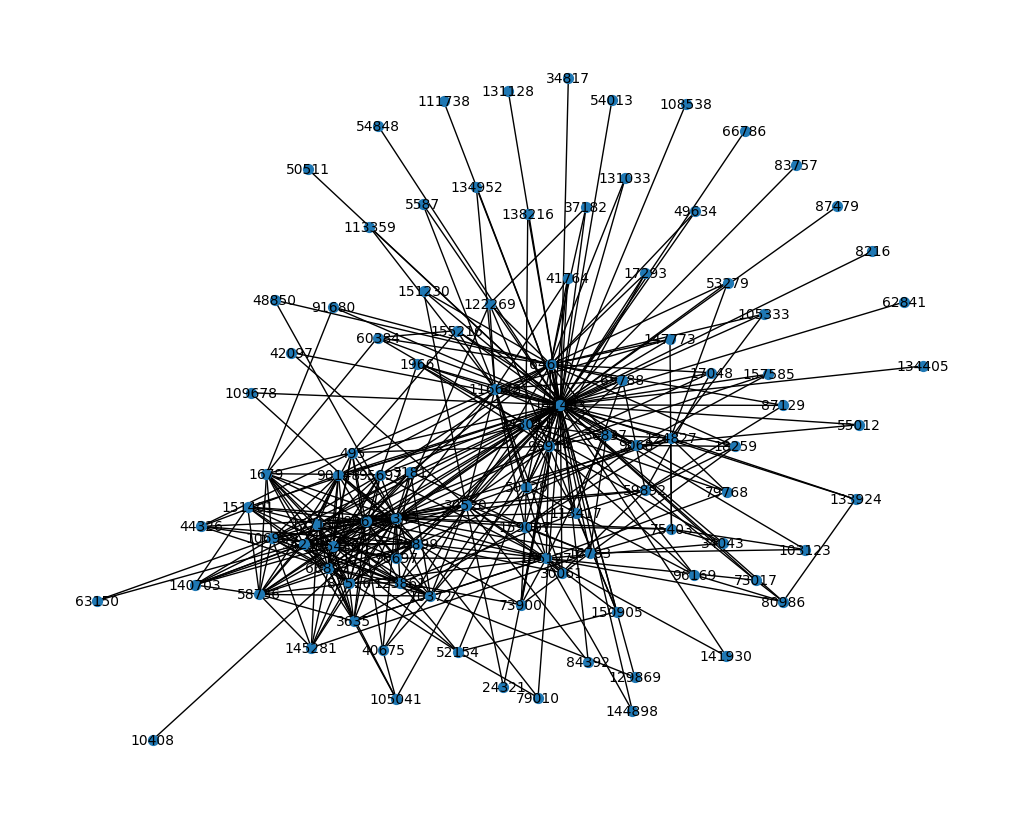

In [7]:
# Since the graph is large, we'll visualize a subgraph of the first 100 nodes.
subG = G.subgraph(list(G.nodes)[:100])

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(subG, with_labels=True, node_size=50, font_size=10)
plt.show()

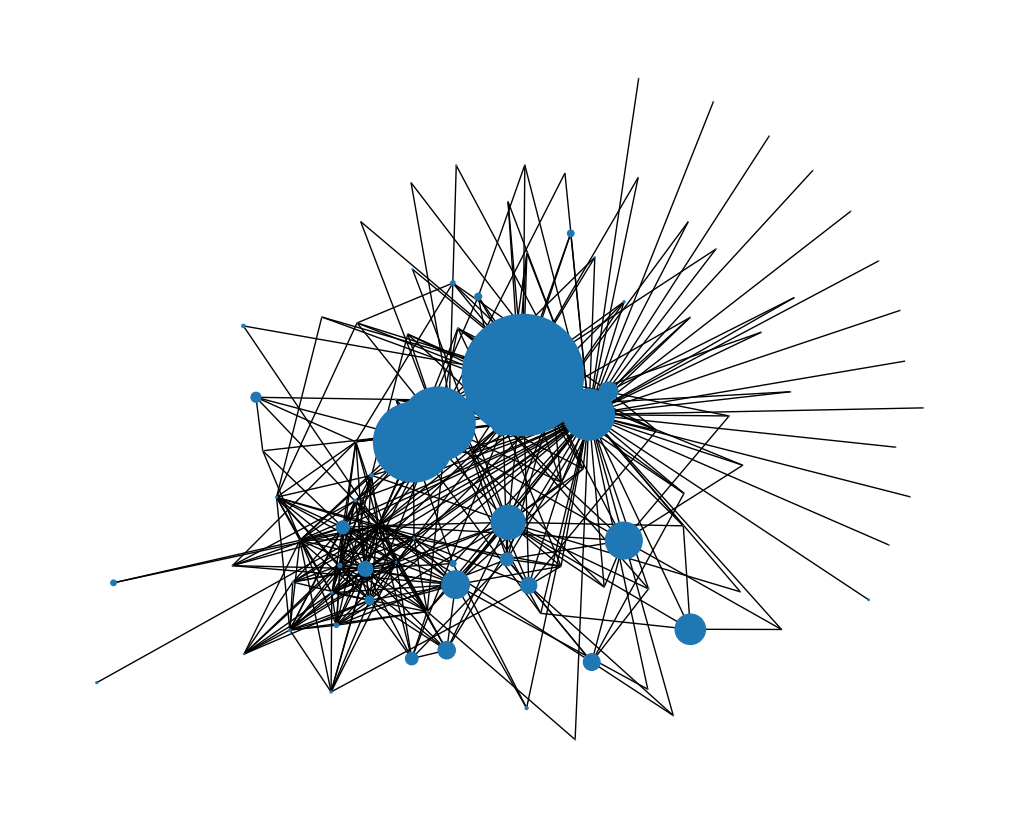

In [8]:
#draw the same graph but make the nodes proportional to the number of the feature "views"

# Create a list of sizes, one for each node in the graph
sizes = []
sumViews =  sum([G.nodes[node]['views'] for node in G.nodes])
for node_id in subG.nodes():
    # Get the number of views of the node
    views = subG.nodes[node_id]['views']
    # Append the size to the list
    sizes.append(views/sumViews * 10**6)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(subG, with_labels=False, node_size=sizes, font_size=10)
plt.show()




In [9]:
# Calculate the average degree of the Twitch graph
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

# Generate a random graph with the same number of nodes and average degree
random_G = nx.erdos_renyi_graph(n=G.number_of_nodes(), p=average_degree / (G.number_of_nodes() - 1))


# Get the degree distribution of the Twitch graph
degrees_twitch = [G.degree(n) for n in G.nodes()]
degrees_random = [random_G.degree(n) for n in random_G.nodes()]

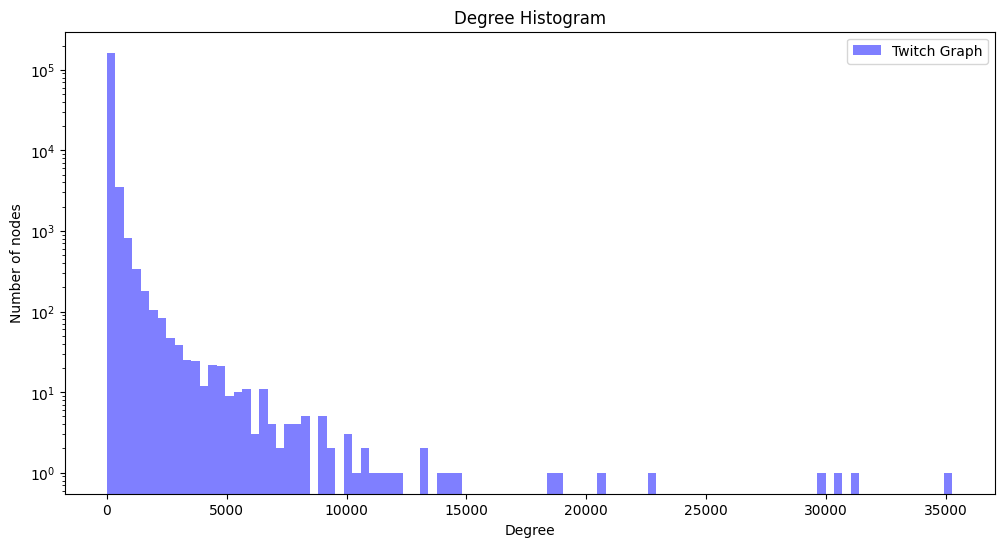

In [10]:
# Draw the histogram of degrees for the Twitch graph
plt.figure(figsize=(12, 6))
plt.hist(degrees_twitch, bins=100, alpha=0.5, color='blue', label='Twitch Graph')
plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.legend(loc='upper right')
plt.yscale('log')  # Use logarithmic scale if necessary due to large range of values
plt.show()

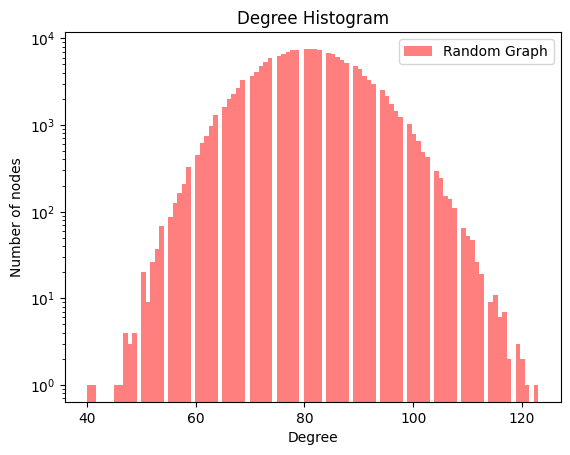

In [11]:
# Draw the histogram of degrees for the random graph
plt.hist(degrees_random, bins=100, alpha=0.5, color='red', label='Random Graph')

plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.legend(loc='upper right')
plt.yscale('log')  # Use logarithmic scale if necessary due to large range of values
plt.show()

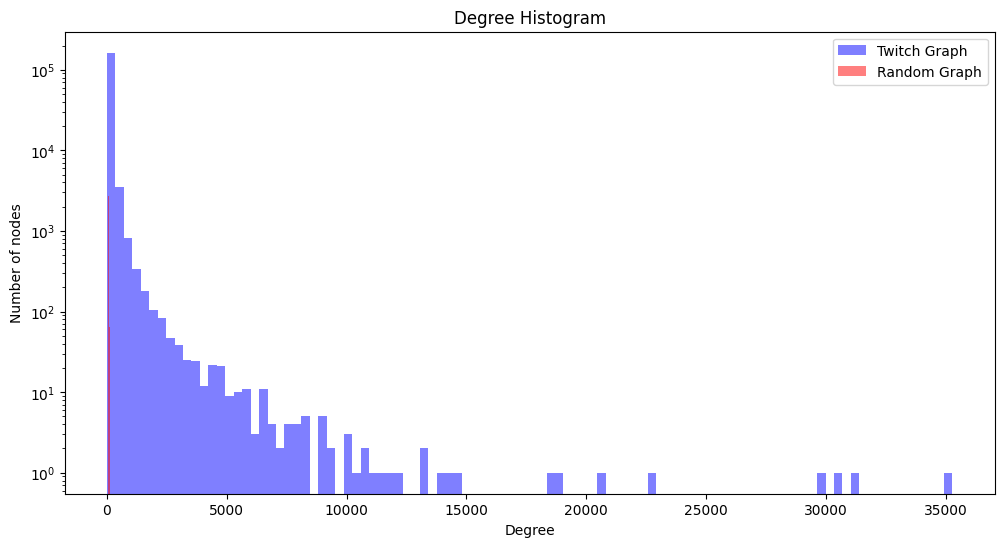

In [12]:
# Draw the histogram of degrees for the Twitch graph with random graph
plt.figure(figsize=(12, 6))
plt.hist(degrees_twitch, bins=100, alpha=0.5, color='blue', label='Twitch Graph')


plt.hist(degrees_random, bins=100, alpha=0.5, color='red', label='Random Graph')

plt.title('Degree Histogram')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.legend(loc='upper right')
plt.yscale('log')  # Use logarithmic scale if necessary due to large range of values
plt.show()

It's a perfect example of what we saw in class : the real graph in real life follow a power law, like this twitch graph, while the random graph follow a binomial law.

The degree distribution of the Twitch graph appears to follow a power-law or a heavy-tailed distribution. This means there are a few nodes with very high degrees (hubs) and many nodes with low degrees. This is a common characteristic of real-world networks, especially social networks, where some individuals (or in this case, channels) are much more connected than others.

The degree distribution of the random graph is more bell-shaped and follows a binomial or Poisson distribution, which is typical for Erdős-Rényi graphs. Most nodes have a degree close to the average degree, with fewer nodes at the extremes. This indicates that in a random graph, nodes are more uniformly connected, and there are no hubs like in the Twitch graph.

In conclusion, these histograms illustrate fundamental differences in network structure. The Twitch graph displays characteristics of a scale-free network with some nodes acting as highly connected hubs, which is typical for social networks. In contrast, the random graph lacks this hub structure and has a more homogeneous distribution of connections, which is indicative of the random processes governing its formation. Such differences have implications for the behavior of processes on the networks, such as information spread, robustness to attacks, and network dynamics.

In [13]:
# Calculate the clustering coefficient for each node in the Twitch graph
clustering_twitch = nx.clustering(G)

# Calculate the average clustering coefficient for the Twitch graph
average_clustering_twitch = sum(clustering_twitch.values()) / len(clustering_twitch)

In [14]:
# Calculate the clustering coefficient for each node in the random graph
clustering_random = nx.clustering(random_G)

# Calculate the average clustering coefficient for the random graph
average_clustering_random = sum(clustering_random.values()) / len(clustering_random)


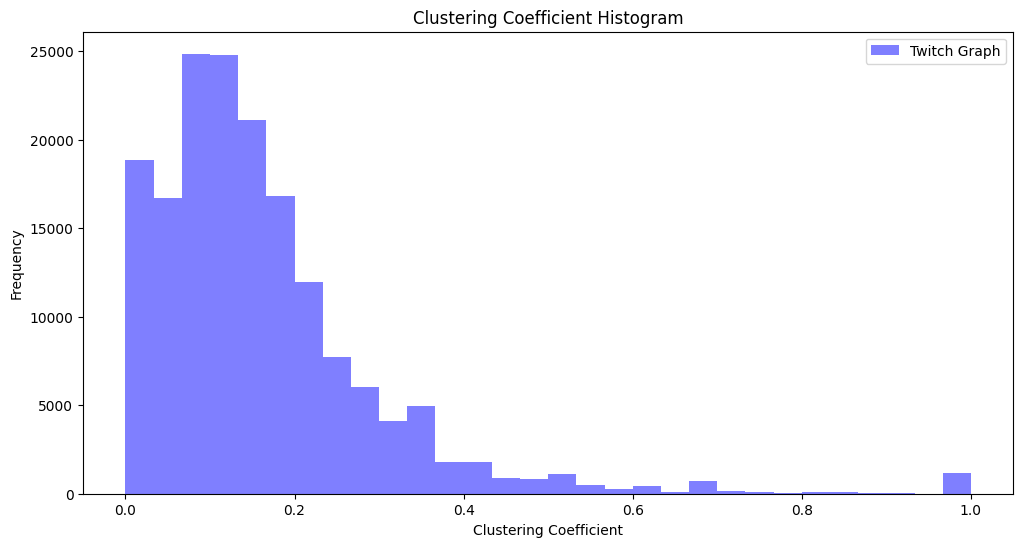

In [15]:
# Draw the histogram of the clustering coefficient for the Twitch graph
plt.figure(figsize=(12, 6))
plt.hist(clustering_twitch.values(), bins=30, alpha=0.5, color='blue', label='Twitch Graph')
plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


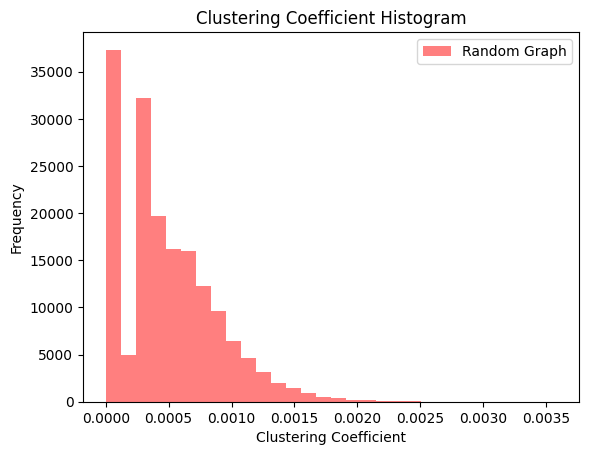

In [16]:
# Draw the histogram of the clustering coefficient for the random graph
plt.hist(clustering_random.values(), bins=30, alpha=0.5, color='red', label='Random Graph')

plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

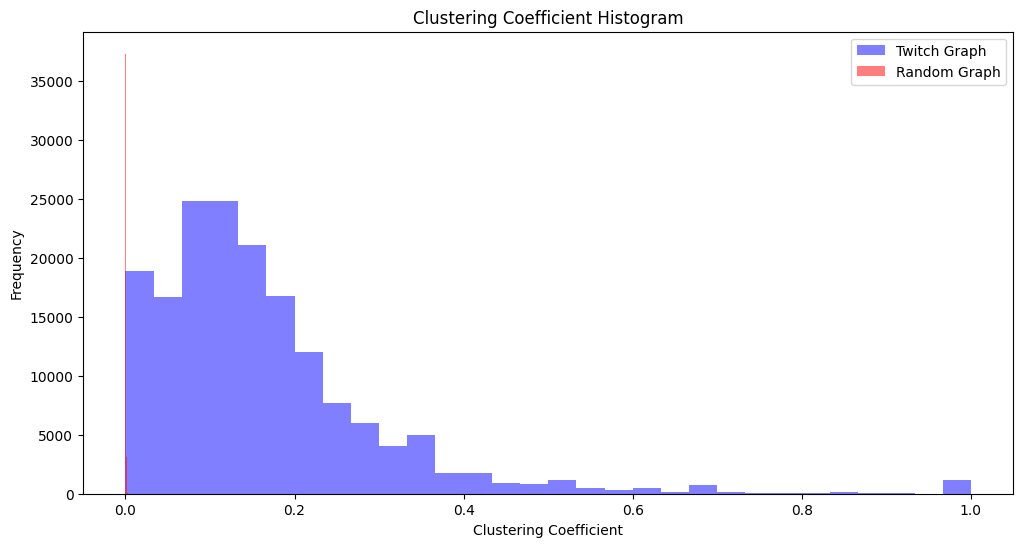

In [17]:
# Draw the histogram of the clustering coefficient for the Twitch graph
plt.figure(figsize=(12, 6))
plt.hist(clustering_twitch.values(), bins=30, alpha=0.5, color='blue', label='Twitch Graph')

# Draw the histogram of the clustering coefficient for the random graph
plt.hist(clustering_random.values(), bins=30, alpha=0.5, color='red', label='Random Graph')

plt.title('Clustering Coefficient Histogram')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [18]:
# Print the average clustering coefficients
print(f"Average clustering coefficient for the Twitch graph: {average_clustering_twitch}")
print(f"Average clustering coefficient for the random graph: {average_clustering_random}")

Average clustering coefficient for the Twitch graph: 0.15992499330884682
Average clustering coefficient for the random graph: 0.0004789337827789821


In [19]:
#vqlue of p for the random graph
average_degree / (G.number_of_nodes() - 1)

0.00048103610439398153

The clustering coefficient distribution for the random graph is heavily skewed towards the lower end, indicating that most nodes have a very low tendency to cluster. This is typical for random graphs where connections between nodes are made purely by chance, and there is no inherent community structure that promotes clustering.

In the clustering coefficient distribution for the Twitch graph, the data is spread across a broader range of clustering coefficients, with a significant number of nodes exhibiting higher clustering. This suggests that the Twitch graph has a community structure with nodes tending to form cliques or tight-knit groups.

The Twitch graph has a notably higher average clustering coefficient (0.1599) compared to the random graph (0.00048). This difference is stark and highlights the fact that the Twitch graph likely has a more complex and intricate community structure compared to the random graph, which lacks such a structure almost entirely.

As we saw in course the clustering coefficient for the random graph is equal to p.

The much higher clustering coefficient in the Twitch graph indicates that the edges are not distributed uniformly at random as they are in the Erdős-Rényi model. Instead, the Twitch graph likely exhibits properties of a scale-free network or has underlying social dynamics that the Erdős-Rényi model does not capture, such as preferential attachment or community formation processes.

In summary, the comparison shows that the Twitch graph has more complex structural properties than the random graph, with a much higher tendency for nodes to cluster together, which is typical of real-world social networks.


In [20]:
# Calculate the diameter of both graphs (maximum distance between any pair of nodes)
diameter_twitch = nx.diameter(G, e=None)
diameter_random = nx.diameter(random_G, e=None)

In [21]:
print(f"Diameter of Twitch graph: {diameter_twitch}")
print(f"Diameter of random graph: {diameter_random}")

Diameter of Twitch graph: 8
Diameter of random graph: 4


2 days to compute !

In [108]:
# Use a subgraph because the graph is too large to calculate the shortest paths
subgraph_nodes = random.sample(list(G.nodes()), k=5000)  
subgraph = G.subgraph(subgraph_nodes)

In [109]:
print(f"edges of the subgraph: {subgraph.number_of_edges()}")

edges of the subgraph: 6041


In [110]:
# Calculate shortest paths in the subgraph
path_length_subgraph = dict(nx.all_pairs_shortest_path_length(subgraph))
distances_subgraph = [dist for target in path_length_subgraph.values() for dist in target.values()]

# Generate a corresponding random subgraph with the same number of nodes and probability p
p_subgraph = (2.0 * len(subgraph.edges())) / (len(subgraph_nodes) * (len(subgraph_nodes) - 1))
random_subgraph = nx.erdos_renyi_graph(n=len(subgraph_nodes), p=p_subgraph)

# Calculate shortest paths in the random subgraph
path_length_random_subgraph = dict(nx.all_pairs_shortest_path_length(random_subgraph))
distances_random_subgraph = [dist for target in path_length_random_subgraph.values() for dist in target.values()]

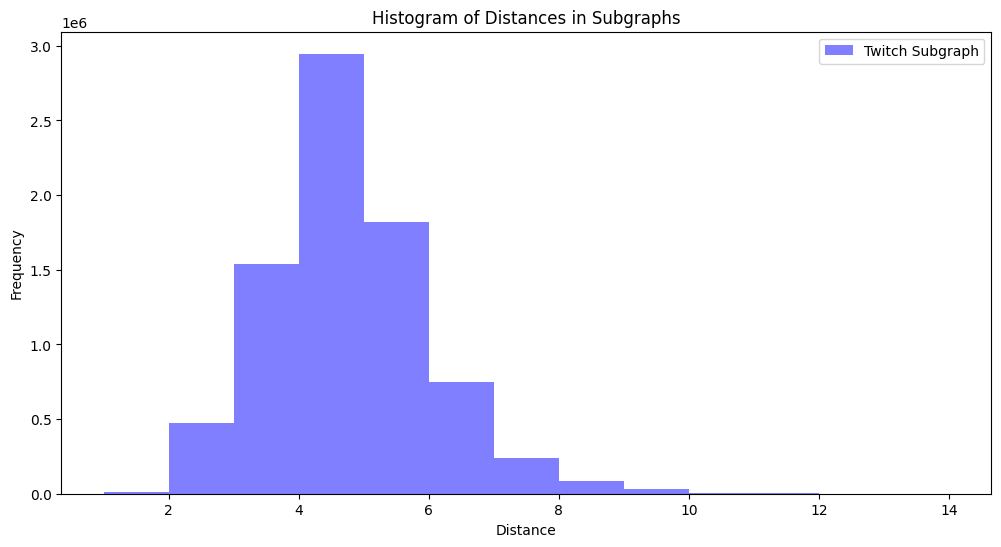

In [111]:
# Draw the histogram of distances
plt.figure(figsize=(12, 6))
plt.hist(distances_subgraph, bins=range(1, max(distances_subgraph) + 1), alpha=0.5, color='blue', label='Twitch Subgraph')
plt.title('Histogram of Distances in Subgraphs')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


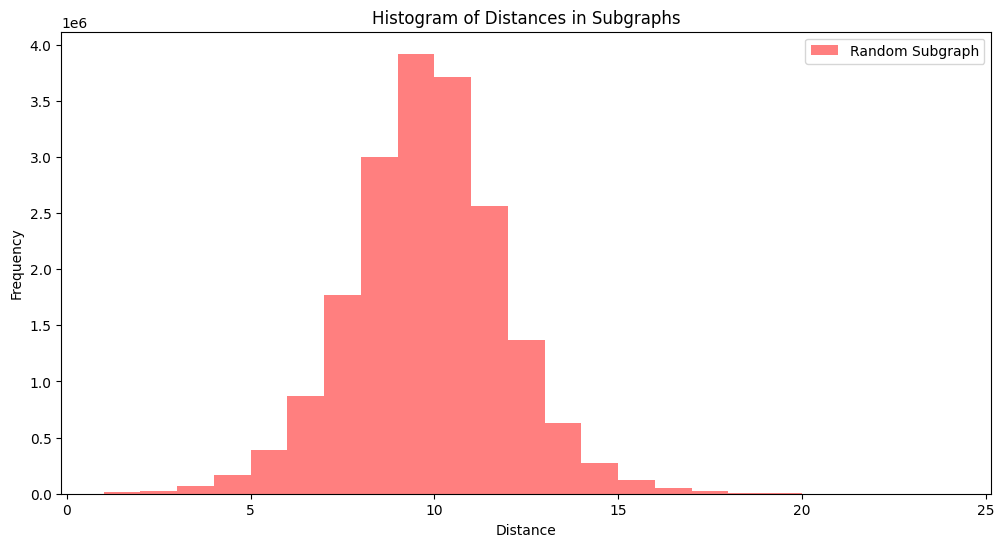

In [112]:
# Draw the histogram of distances
plt.figure(figsize=(12, 6))
plt.hist(distances_random_subgraph, bins=range(1, max(distances_random_subgraph) + 1), alpha=0.5, color='red', label='Random Subgraph')
plt.title('Histogram of Distances in Subgraphs')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [113]:
# Print the diameter and average distance for the subgraphs
print(f"Diameter of Twitch subgraph: {max(distances_subgraph)}")
print(f"Diameter of random subgraph: {max(distances_random_subgraph)}")
print(f"Average distance in Twitch subgraph: {sum(distances_subgraph) / len(distances_subgraph)}")
print(f"Average distance in random subgraph: {sum(distances_random_subgraph) / len(distances_random_subgraph)}")

Diameter of Twitch subgraph: 14
Diameter of random subgraph: 24
Average distance in Twitch subgraph: 4.259469436639647
Average distance in random subgraph: 9.311479454586081


For the whole graph, there's only the diameter, as it was impossible to store the histogram of distances due to the size and time involved. The diameter took 3000 minutes to compute, i.e. over 2 full days.

So note that for everything the subgraphs are not very representative because the behaviors and values change totally when I tried many times, it's quite random, I will still discuss the subgraphs results.

The diameter of the full Twitch graph is twice that of the random graph ( 8 and 4), indicating that the longest shortest path between any two nodes in the Twitch graph is significantly longer. This can suggest that the Twitch graph has a more elongated structure or less uniform connectivity compared to the random graph.

For the subgraphs, the Twitch subgraph has a diameter of 14, which is notably smaller than that of the random subgraph at 24. The diameter is the longest shortest path between any two nodes in the network. A smaller diameter in the Twitch subgraph suggests that despite its complex structure, it is relatively easy to navigate from one node to another. However, given that these are subgraphs, the diameter can be heavily influenced by the particular nodes that were sampled. If key nodes that serve as bridges in the larger graph are missed or sampled, the diameter can appear artificially large or low.

The average distance in the Twitch subgraph is 4.259, significantly lower than the 9.311 of the random subgraph. This indicates that on average, nodes in the Twitch subgraph are closer to each other than nodes in the random subgraph. This is consistent with the idea that social networks (like the Twitch network) tend to have "small-world" properties, meaning that any two nodes can be connected through a short sequence of intermediate steps.

The histogram for the random subgraph shows a wider distribution of path lengths with a peak at higher distances. This suggests that the random subgraph has more variance in node-to-node distances and that nodes are, on average, farther apart.

The histogram for the Twitch subgraph shows a steeper decline and a concentration of frequencies at lower path lengths. This indicates a tendency for nodes to be closer to each other, which might reflect the presence of tightly-knit communities or clusters within the network.


Overall, the Twitch network exhibits structural characteristics that differ significantly from those of a random graph. It should shows characteristics typical of social networks but it's hard to see just by taking a subgraph. 
We can still see that diameter is different for the full graphs, and note that after a threshold when you take a bigger amount of nodes, the diameter will decrease.

In [9]:
# Calculate the degree assortativity coefficient
assortativity_coefficient = nx.degree_assortativity_coefficient(G)

print(f"Degree assortativity coefficient: {assortativity_coefficient}")

#assortativity coefficient for the random graph

randomG = nx.erdos_renyi_graph(n=G.number_of_nodes(), p=average_degree / (G.number_of_nodes() - 1))
assortativity_coefficient_random = nx.degree_assortativity_coefficient(randomG)

print(f"Degree assortativity coefficient for random graph: {assortativity_coefficient_random}")
